In [1]:
%matplotlib inline
import pandas as pd
import networkx as nx

#Ignore matplotlib warnings
import warnings
from operator import itemgetter
from networkx.algorithms import community

In [2]:
from sklearn.manifold import TSNE
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from node2vec import Node2Vec
sns.set_style('whitegrid')

In [3]:
df = pd.read_csv("relasi.csv")
df.head()

NamaMenteri       NamaPresiden                     Asal
0       A._M._Hendropriyono  Abdurrahman_Wahid               Yogyakarta
1              Agum_Gumelar  Abdurrahman_Wahid  Tasikmalaya, Jawa Barat
2            Freddy_Numberi  Abdurrahman_Wahid     Yapen Waropen, Papua
3         Hasballah_M._Saad  Abdurrahman_Wahid              Pidie, Aceh
4  Susilo_Bambang_Yudhoyono  Abdurrahman_Wahid      Pacitan, Jawa Timur

In [4]:
g = nx.from_pandas_edgelist(df, source = 'NamaMenteri',target = 'NamaPresiden')

In [5]:
df2 = df[['NamaMenteri','Asal']].dropna(axis=0,how='any')
df2.head()

NamaMenteri                     Asal
0       A._M._Hendropriyono               Yogyakarta
1              Agum_Gumelar  Tasikmalaya, Jawa Barat
2            Freddy_Numberi     Yapen Waropen, Papua
3         Hasballah_M._Saad              Pidie, Aceh
4  Susilo_Bambang_Yudhoyono      Pacitan, Jawa Timur

In [6]:
mylist = df2.values.tolist()
mylist

[['A._M._Hendropriyono', 'Yogyakarta'],
 ['Agum_Gumelar', 'Tasikmalaya, Jawa Barat'],
 ['Freddy_Numberi', 'Yapen Waropen, Papua'],
 ['Hasballah_M._Saad', 'Pidie, Aceh'],
 ['Susilo_Bambang_Yudhoyono', 'Pacitan, Jawa Timur'],
 ['Yusril_Ihza_Mahendra', 'Belitung Timur, Kepulauan Bangka Belitung'],
 ['Nur_Mahmudi_Ismail', 'Kediri, Jawa Timur'],
 ['Achmad_Sujudi', 'Bondowoso, Jawa Timur'],
 ['Mohamad_Prakosa', 'Yogyakarta'],
 ['Bomer_Pasaribu', 'Padang Sidempuan, Sumatera Utara'],
 ['Ryaas_Rasyid', 'Gowa, Sulawesi Selatan'],
 ['Luhut_Binsar_Panjaitan', 'Toba Samosir, Sumatera Utara'],
 ['Yahya_Muhaimin', 'Brebes, Jawa Tengah'],
 ['Zarkasih_Nur', 'Tangerang, Jawa Barat'],
 ['Mahadi_Sinambela', 'Tanjung Balai, Sumatera Utara'],
 ['Alirahman', 'Lampung'],
 ['Djohan_Effendi', 'Kandangan, Kalimantan Selatan'],
 ['Muhammad_Yunus_Yosfiah', 'Rappang, Sulawesi Selatan'],
 ['A._M._Hendropriyono', 'Yogyakarta'],
 ['Agum_Gumelar', 'Tasikmalaya, Jawa Barat'],
 ['Akbar_Tanjung', 'Sibolga, Sumatera Utara'

In [7]:
g.add_edges_from(mylist,label="Asal")

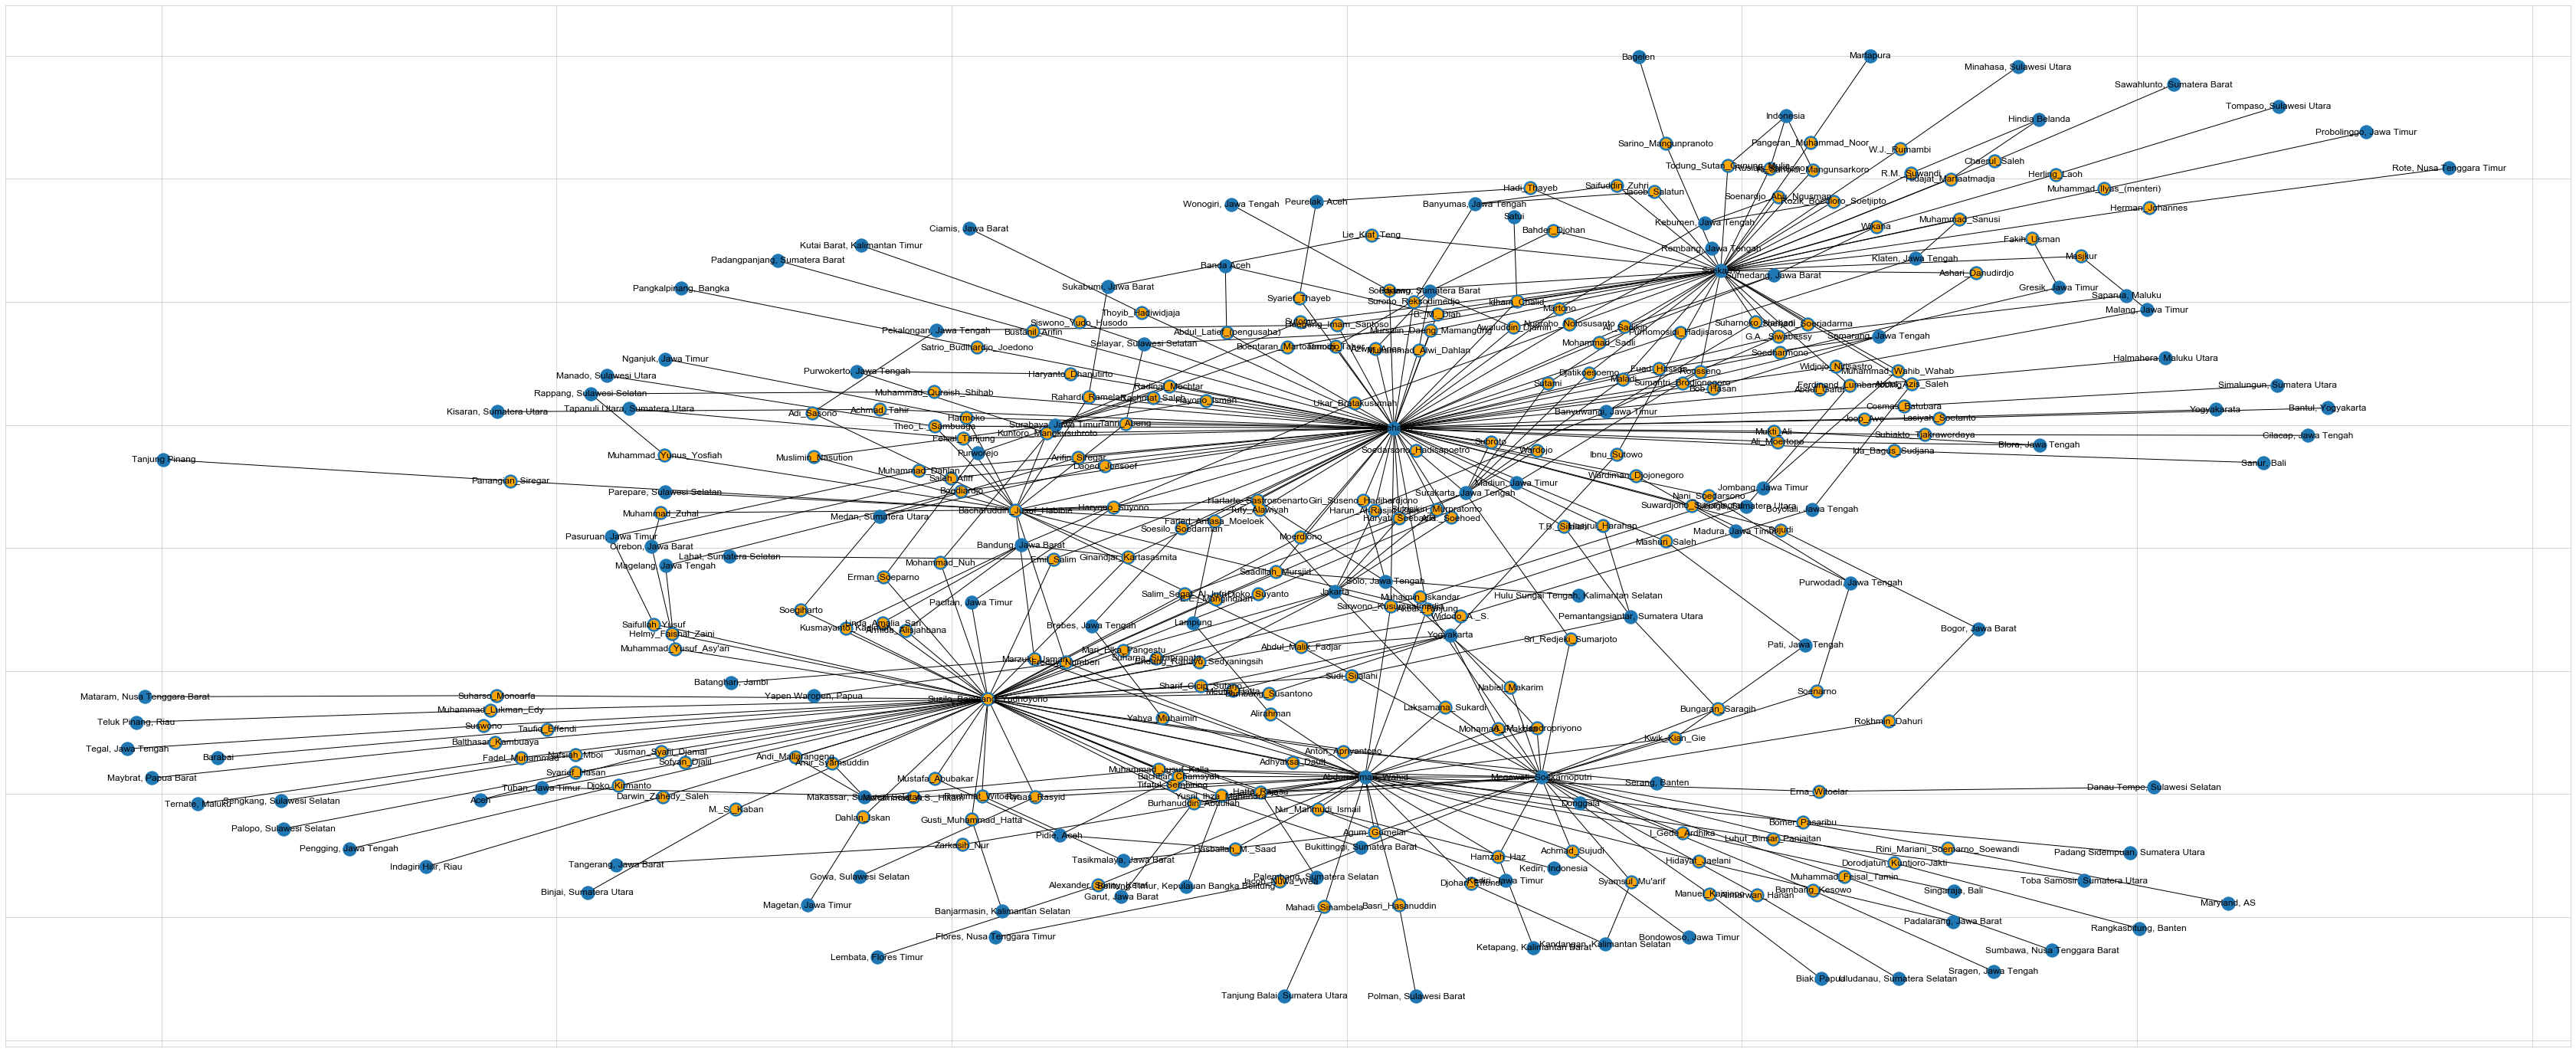

In [8]:
labels = [i for i in dict(g.nodes).keys()]
labels = {i:i for i in dict(g.nodes).keys()}
labels

fig, ax = plt.subplots(figsize=(60,25))
layout = nx.spring_layout(g,iterations=50)
nx.draw_networkx_nodes(g, layout, ax=ax, labels=True)
nx.draw_networkx_edges(g, layout, ax=ax)
_ = nx.draw_networkx_labels(g, layout, labels, ax=ax)

asalbanyak = [menteri for menteri in df.NamaMenteri if g.degree(menteri)>1]
nx.draw_networkx_nodes(g, layout, nodelist=asalbanyak,node_color='orange', node_size=150)

In [9]:
density = nx.density(g)
print("Network Density:", density)

Network Density: 0.008553852873730571


In [22]:
degree_dict = dict(g.degree(g.nodes()))
degree_dict

{'A._M._Hendropriyono': 3,
 'Abdurrahman_Wahid': 31,
 'Agum_Gumelar': 3,
 'Freddy_Numberi': 4,
 'Hasballah_M._Saad': 2,
 'Susilo_Bambang_Yudhoyono': 58,
 'Yusril_Ihza_Mahendra': 4,
 'Nur_Mahmudi_Ismail': 4,
 'Achmad_Sujudi': 3,
 'Mohamad_Prakosa': 3,
 'Bomer_Pasaribu': 2,
 'Ryaas_Rasyid': 3,
 'Luhut_Binsar_Panjaitan': 2,
 'Yahya_Muhaimin': 2,
 'Zarkasih_Nur': 2,
 'Mahadi_Sinambela': 2,
 'Alirahman': 2,
 'Djohan_Effendi': 2,
 'Muhammad_Yunus_Yosfiah': 2,
 'Bacharuddin_Jusuf_Habibie': 22,
 'Megawati_Soekarnoputri': 29,
 'Akbar_Tanjung': 5,
 'Bachtiar_Chamsyah': 3,
 'Dorodjatun_Kuntjoro-Jakti': 2,
 'Hamzah_Haz': 3,
 'Hatta_Rajasa': 3,
 'I_Gede_Ardhika': 3,
 'Muhammad_Jusuf_Kalla': 4,
 'Kwik_Kian_Gie': 3,
 'Nabiel_Makarim': 2,
 'Burhanuddin_Abdullah': 4,
 'Abdul_Malik_Fadjar': 3,
 'Jacob_Nuwa_Wea': 2,
 'Rini_Mariani_Soemarno_Soewandi': 2,
 'Bungaran_Saragih': 2,
 'Soenarno': 2,
 'Rokhmin_Dahuri': 2,
 'Muhammad_Feisal_Tamin': 2,
 'Manuel_Kaisiepo': 2,
 "Syamsul_Mu'arif": 2,
 'Laksamana_Suka

(-1.0968427277727166,
 0.9548442366320683,
 -0.9093439891663309,
 0.8828282728433929)

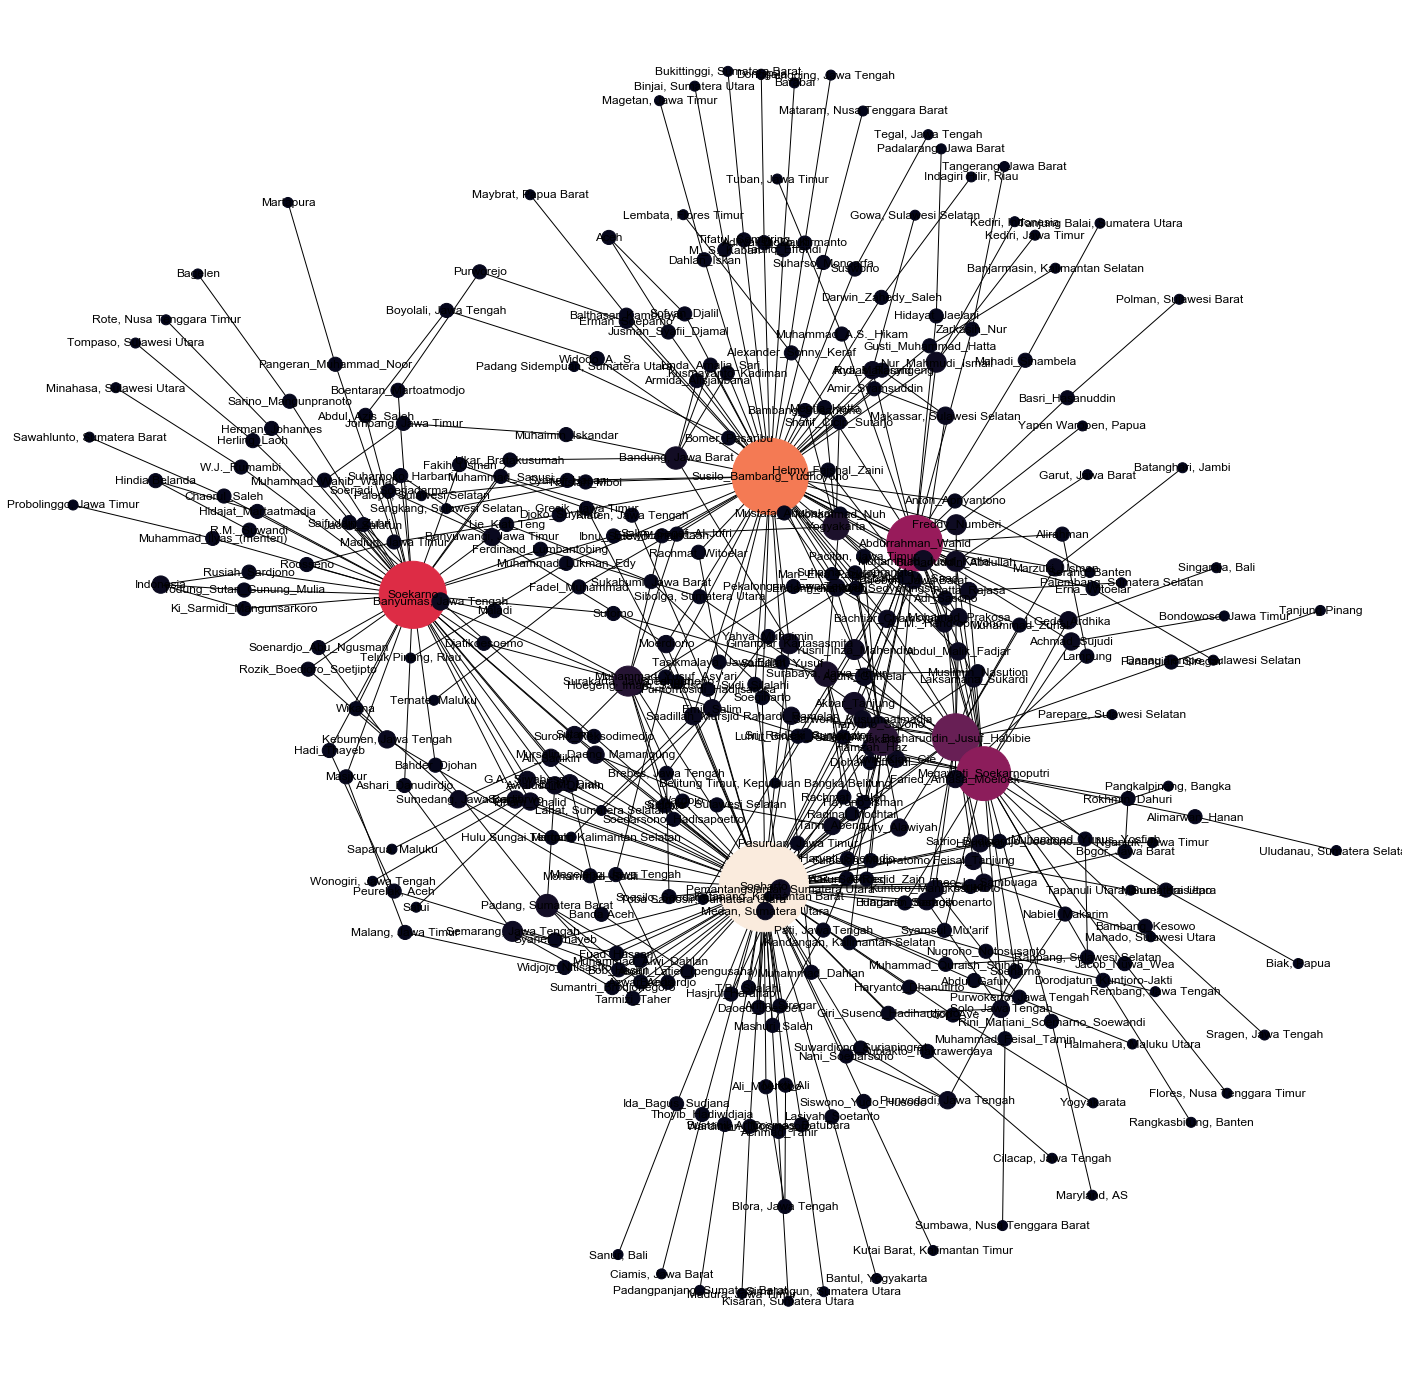

In [51]:
pos = nx.spring_layout(g)
node_color = [20000.0 * g.degree(v) for v in g]
node_size = [v * 100 for v in degree_dict.values()]
plt.figure(figsize=(25,25))
nx.draw_networkx(g, pos=pos, with_labels=True,
                node_color=node_color,
                 node_size=node_size)
plt.axis('off')

In [12]:
betweenness_dict = nx.betweenness_centrality(g)
eigenvector_dict = nx.eigenvector_centrality(g)
closeness_dict = nx.closeness_centrality(g)

nx.set_node_attributes(g, betweenness_dict,'betweenness')
nx.set_node_attributes(g, eigenvector_dict,'eigenvector')
nx.set_node_attributes(g, closeness_dict,'closeness')

(-1.094151808567192,
 0.9687682150670325,
 -0.6194974810948597,
 0.7359335344104884)

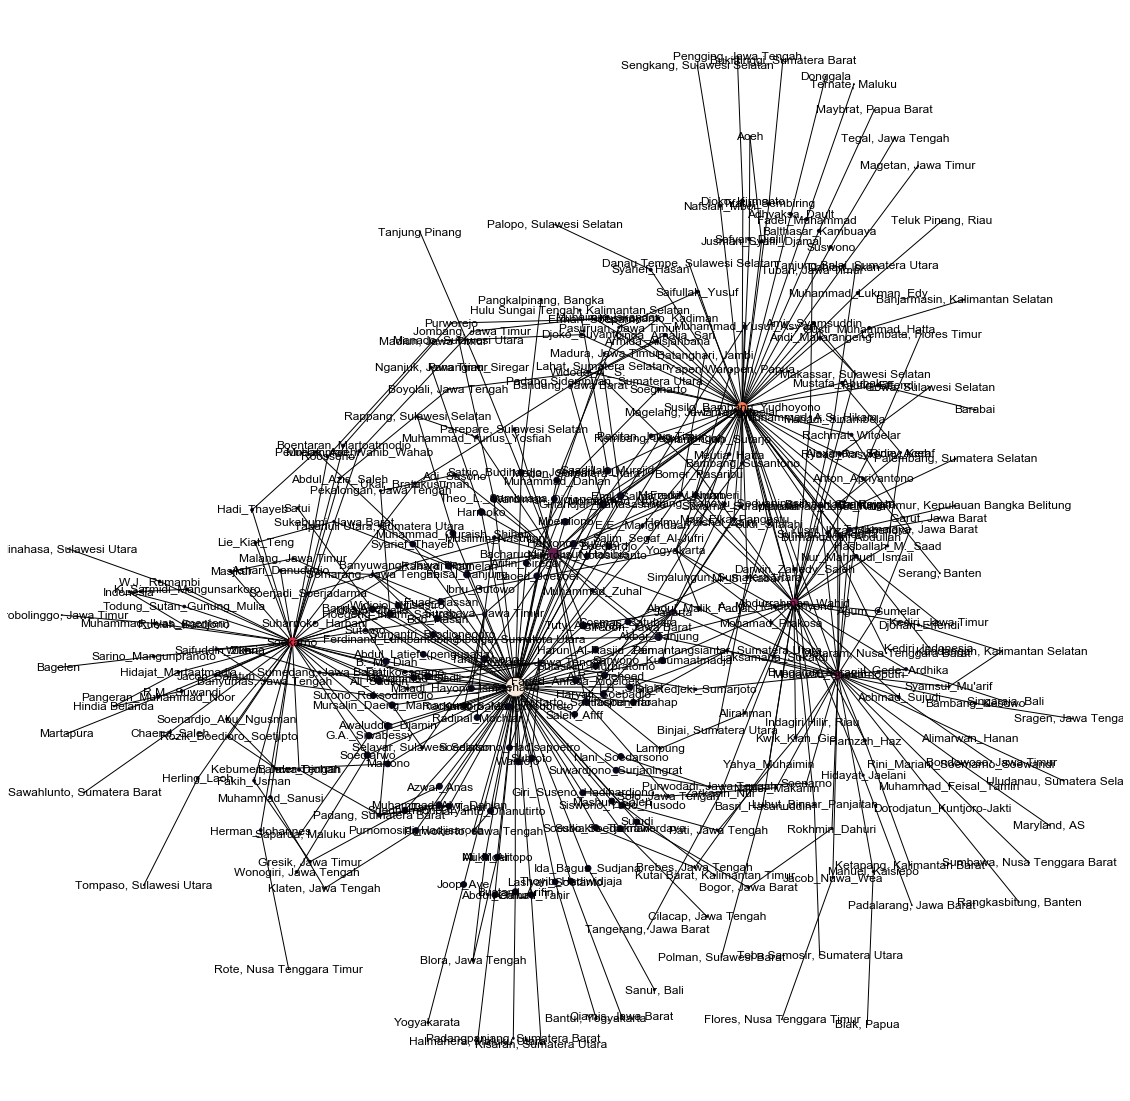

In [45]:
pos = nx.spring_layout(g)
node_color = [20000.0 * g.degree(v) for v in g]
node_size = [v * 500 for v in eigenvector_dict.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(g, pos=pos, with_labels=True,
                node_color=node_color,
                 node_size=node_size)
plt.axis('off')

In [46]:
urutan_eigen = sorted(eigenvector_dict.items(), key=itemgetter(1),reverse=True)

print("Lima Besar EigenVector centrality:")
for b in urutan_eigen[:5]:
    print(b)

Lima Besar EigenVector centrality:
('Soeharto', 0.6302228170122193)
('Bacharuddin_Jusuf_Habibie', 0.20734205942880746)
('Susilo_Bambang_Yudhoyono', 0.17382453898807596)
('Soekarno', 0.13258409734592527)
('Ginandjar_Kartasasmita', 0.10753606304521482)


(-0.9732182020644311,
 0.9269265722983956,
 -1.1022063143934144,
 0.983660624680473)

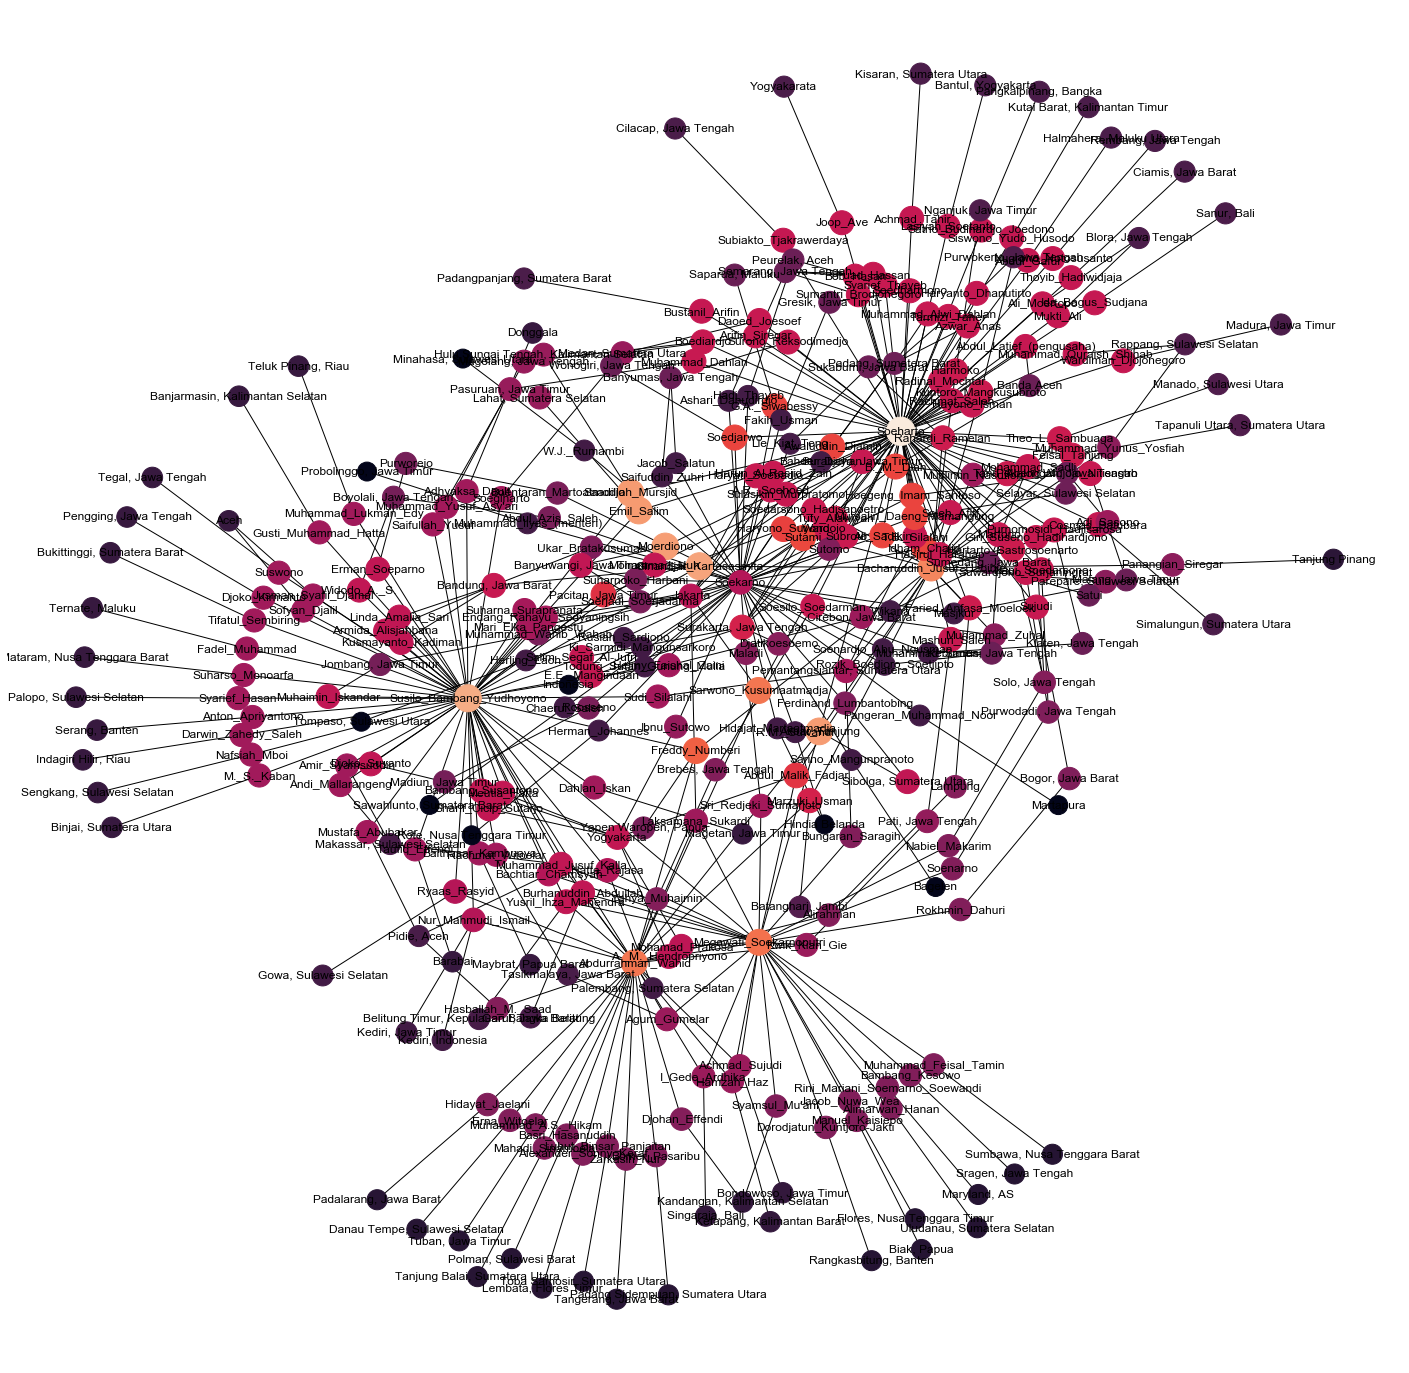

In [57]:
pos = nx.spring_layout(g)
node_color = [20000.0 * closeness_dict[v] for v in g]
node_size = [v * 2000 for v in closeness_dict.values()]
plt.figure(figsize=(25,25))
nx.draw_networkx(g, pos=pos, with_labels=True,
                node_color=node_color,
                 node_size=node_size)
plt.axis('off')

In [48]:
urutan_closeness = sorted(closeness_dict.items(), key=itemgetter(1),reverse=True)

print("Semua Closeness centrality:")
for b in urutan_closeness[:5]:
    print(b)

Semua Closeness centrality:
('Soeharto', 0.4016990291262136)
('Susilo_Bambang_Yudhoyono', 0.36574585635359114)
('Ginandjar_Kartasasmita', 0.36095965103598693)
('Moerdiono', 0.357451403887689)
('Akbar_Tanjung', 0.35706580366774543)


(-0.840238607545909,
 1.0070650574267996,
 -0.9191916792165609,
 1.0913900799626934)

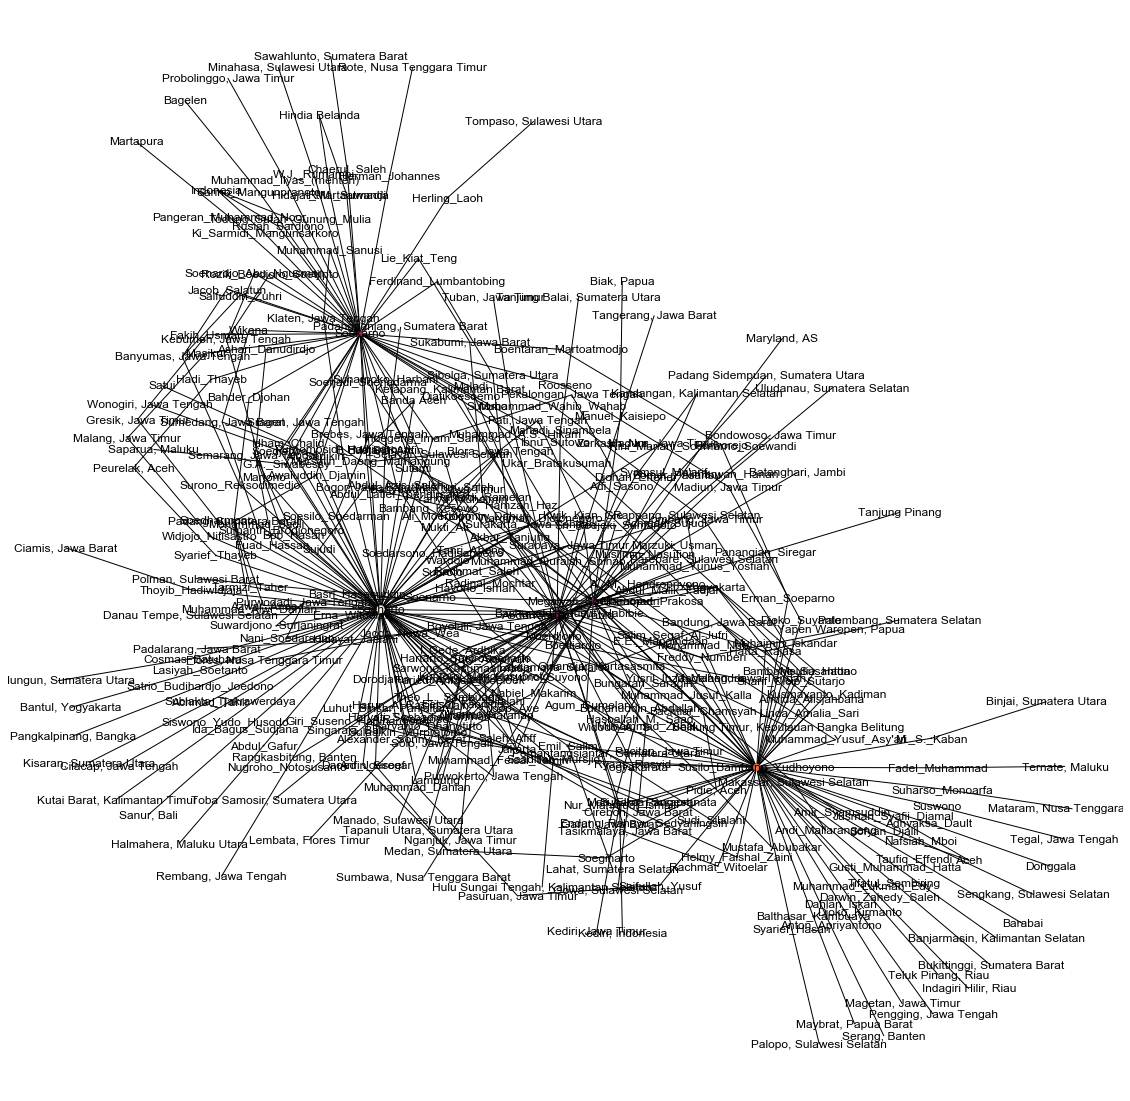

In [41]:
pos = nx.spring_layout(g)
node_color = [20000.0 * betweenness_dict[v] for v in g]
node_size = [v * 100 for v in betweenness_dict.values()]
plt.figure(figsize=(20,20))
nx.draw_networkx(g, pos=pos, with_labels=True,
                node_color=node_color,
                 node_size=node_size)
plt.axis('off')

In [42]:
urutan_betweenness = sorted(betweenness_dict.items(), key=itemgetter(1),reverse=True)

print("Lima Besar Betweenness centrality:")
for b in urutan_betweenness[:5]:
    print(b)

Lima Besar Betweenness centrality:
('Soeharto', 0.5557362592649842)
('Susilo_Bambang_Yudhoyono', 0.3868835146097224)
('Soekarno', 0.22630823854910148)
('Abdurrahman_Wahid', 0.18325593174610383)
('Megawati_Soekarnoputri', 0.1500936947333715)
